In [20]:
# imports
import os

from alphabet_detector import AlphabetDetector

import pandas as pd
import numpy as np

from tqdm import tqdm

tqdm.pandas()

In [2]:
# instantiate and check detector
ab_detector = AlphabetDetector()

In [23]:
# alphabet detector function
def detect_alphabet(text):
    
    if text:
        uni_string = str(text)
    
        ab = ab_detector.detect_alphabet(uni_string)
        if "CYRILLIC" in ab:
            return "CYRILLIC"
        return ab.pop() if len(ab) != 0 else 'UND'
    else:
        return 'UND'

In [24]:
detect_alphabet('hello world')

'LATIN'

In [5]:
data_dir =  os.path.join('..','..','data')
all_data_path = os.path.join(data_dir, 'allCountries.txt')

In [6]:
all_columns = ['geonameid', 
               'name', 'asciiname',
               'alternate_names', 
               'latitude',
               'longitude', 
               'feature class',
               'feature code',
               'country_code',
               'cc2', 
               'admin1 code',
               'admin2 code', 
               'admin3 code',
               'admin4 code',
               'population',
               'elevation',
               'dem',
               'timezone',
               'modification date']

basic_cols = ['geonameid',
              'name', 
              'asciiname',
              'alternate_names']

In [28]:
df = pd.read_csv(
    all_data_path,
    header=None, 
    sep='\t', 
    names=all_columns,
    usecols=basic_cols,
    low_memory=False,
    nrows=200000
)

# Convert np.nan to None
df = df.where((pd.notnull(df)), None)

In [29]:
df.head()

,geonameid,name,asciiname,alternate_names
0,2986043,Pic de Font Blanca,Pic de Font Blanca,"Pic de Font Blanca,Pic du Port"
1,2994701,Roc Mélé,Roc Mele,"Roc Mele,Roc Meler,Roc Mélé"
2,3007683,Pic des Langounelles,Pic des Langounelles,Pic des Langounelles
3,3017832,Pic de les Abelletes,Pic de les Abelletes,"Pic de la Font-Negre,Pic de la Font-Nègre,Pic ..."
4,3017833,Estany de les Abelletes,Estany de les Abelletes,"Estany de les Abelletes,Etang de Font-Negre,Ét..."


In [30]:
df.isnull().sum()

geonameid              0
name                   0
asciiname              1
alternate_names    61091
dtype: int64

In [31]:
df['alternate_names_list'] = df['alternate_names'].apply(lambda x: x.split(',') if x else [])

In [32]:
df['n_alternate_names'] = df['alternate_names_list'].apply(len)

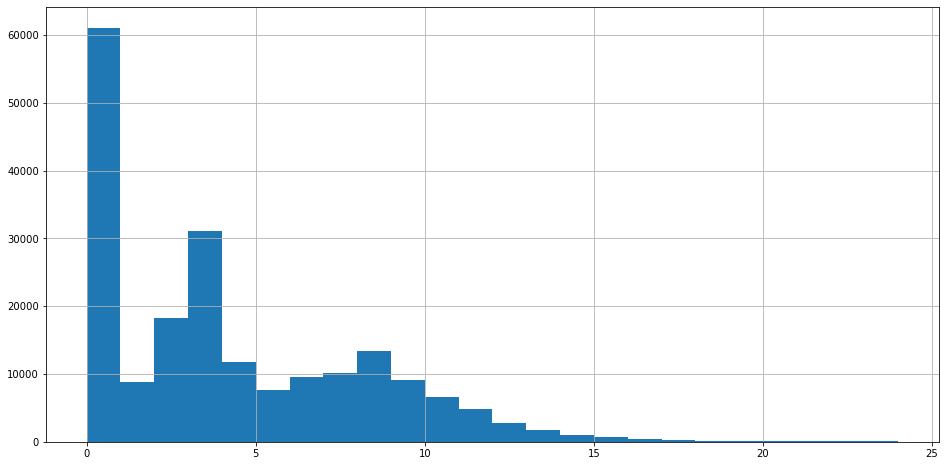

In [33]:
df['n_alternate_names'].hist(figsize=(16, 8), bins=range(0, 25))

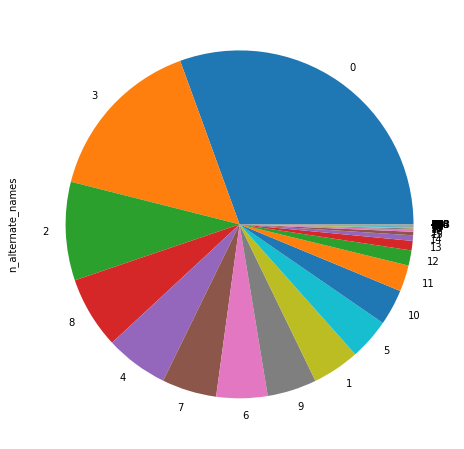

In [34]:
df['n_alternate_names'].value_counts().plot(kind='pie', figsize=(8, 8 ))

In [35]:
counts = (100 * df['n_alternate_names'].value_counts() / df['n_alternate_names'].sum()).sort_index()

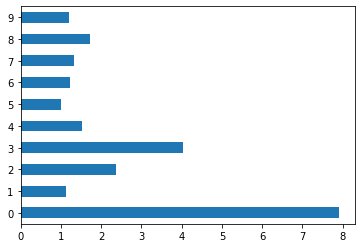

In [36]:
counts.head(10).plot('barh')

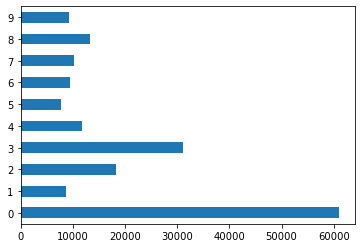

In [37]:
df['n_alternate_names'].value_counts().sort_index().head(10).plot(kind='barh')

In [40]:
df['name_aplhabet'] = df['name'].progress_apply(detect_alphabet)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:01<00:00, 121340.05it/s]


In [46]:
df['alternate_names_aplhabet'] = df['alternate_names_list'].progress_apply(lambda l: [detect_alphabet(n) for n in l])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:05<00:00, 33931.62it/s]


In [47]:
df.head()

,geonameid,name,asciiname,alternate_names,alternate_names_list,n_alternate_names,name_aplhabet,alternate_names_aplhabet
0,2986043,Pic de Font Blanca,Pic de Font Blanca,"Pic de Font Blanca,Pic du Port","[Pic de Font Blanca, Pic du Port]",2,LATIN,"[LATIN, LATIN]"
1,2994701,Roc Mélé,Roc Mele,"Roc Mele,Roc Meler,Roc Mélé","[Roc Mele, Roc Meler, Roc Mélé]",3,LATIN,"[LATIN, LATIN, LATIN]"
2,3007683,Pic des Langounelles,Pic des Langounelles,Pic des Langounelles,[Pic des Langounelles],1,LATIN,[LATIN]
3,3017832,Pic de les Abelletes,Pic de les Abelletes,"Pic de la Font-Negre,Pic de la Font-Nègre,Pic ...","[Pic de la Font-Negre, Pic de la Font-Nègre, P...",3,LATIN,"[LATIN, LATIN, LATIN]"
4,3017833,Estany de les Abelletes,Estany de les Abelletes,"Estany de les Abelletes,Etang de Font-Negre,Ét...","[Estany de les Abelletes, Etang de Font-Negre,...",3,LATIN,"[LATIN, LATIN, LATIN]"


In [49]:
df['n_alt_gte_1'] = df['n_alternate_names'] >= 1
df['n_alt_gte_3'] = df['n_alternate_names'] >= 3

In [53]:
# df[df['n_alt_gte_1']]
df['alternate_names_latin'] = df.apply(
    lambda row: [n for n, ab in zip(row['alternate_names_list'],
                                    row['alternate_names_aplhabet'])
                 if ab == 'LATIN'], axis=1)

In [ ]:
# outfile = 'n_alternates_1+_all_countries_raw_dataset.csv'

# df[basic_cols].to_csv(outfile, encoding='utf8', index=False)

In [54]:
df

,geonameid,name,asciiname,alternate_names,alternate_names_list,n_alternate_names,name_aplhabet,alternate_names_aplhabet,n_alt_gte_1,n_alt_gte_3,alternate_names_latin
0,2986043,Pic de Font Blanca,Pic de Font Blanca,"Pic de Font Blanca,Pic du Port","[Pic de Font Blanca, Pic du Port]",2,LATIN,"[LATIN, LATIN]",True,False,"[Pic de Font Blanca, Pic du Port]"
1,2994701,Roc Mélé,Roc Mele,"Roc Mele,Roc Meler,Roc Mélé","[Roc Mele, Roc Meler, Roc Mélé]",3,LATIN,"[LATIN, LATIN, LATIN]",True,True,"[Roc Mele, Roc Meler, Roc Mélé]"
2,3007683,Pic des Langounelles,Pic des Langounelles,Pic des Langounelles,[Pic des Langounelles],1,LATIN,[LATIN],True,False,[Pic des Langounelles]
3,3017832,Pic de les Abelletes,Pic de les Abelletes,"Pic de la Font-Negre,Pic de la Font-Nègre,Pic ...","[Pic de la Font-Negre, Pic de la Font-Nègre, P...",3,LATIN,"[LATIN, LATIN, LATIN]",True,True,"[Pic de la Font-Negre, Pic de la Font-Nègre, P..."
4,3017833,Estany de les Abelletes,Estany de les Abelletes,"Estany de les Abelletes,Etang de Font-Negre,Ét...","[Estany de les Abelletes, Etang de Font-Negre,...",3,LATIN,"[LATIN, LATIN, LATIN]",True,True,"[Estany de les Abelletes, Etang de Font-Negre,..."
5,3023203,Port Vieux de la Coume d’Ose,Port Vieux de la Coume d'Ose,"Port Vieux de Coume d'Ose,Port Vieux de Coume ...","[Port Vieux de Coume d'Ose, Port Vieux de Coum...",4,LATIN,"[LATIN, LATIN, LATIN, LATIN]",True,True,"[Port Vieux de Coume d'Ose, Port Vieux de Coum..."
6,3029315,Port de la Cabanette,Port de la Cabanette,"Port de la Cabanette,Porteille de la Cabanette","[Port de la Cabanette, Porteille de la Cabanette]",2,LATIN,"[LATIN, LATIN]",True,False,"[Port de la Cabanette, Porteille de la Cabanette]"
7,3034945,Port Dret,Port Dret,"Port Dret,Port de Bareites,Port de las Bareyte...","[Port Dret, Port de Bareites, Port de las Bare...",4,LATIN,"[LATIN, LATIN, LATIN, LATIN]",True,True,"[Port Dret, Port de Bareites, Port de las Bare..."
8,3038814,Costa de Xurius,Costa de Xurius,None,[],0,LATIN,[],False,False,[]
9,3038815,Font de la Xona,Font de la Xona,None,[],0,LATIN,[],False,False,[]
